In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *
import numpy as np
np.set_printoptions(threshold=np.inf)

In [3]:
#%run -i batch_analyse_test.py betapic/ -f "corrected flux" -p

#### `single_analysis` on 30 minute - Sector 6

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1486.3 days.
   Duration = 0.75 days.
   T = -26.7
   T/sigma = -5.9
Transit depth = -0.001279
Asym score: 1.3179
Quality flags: 0
maybeTransit


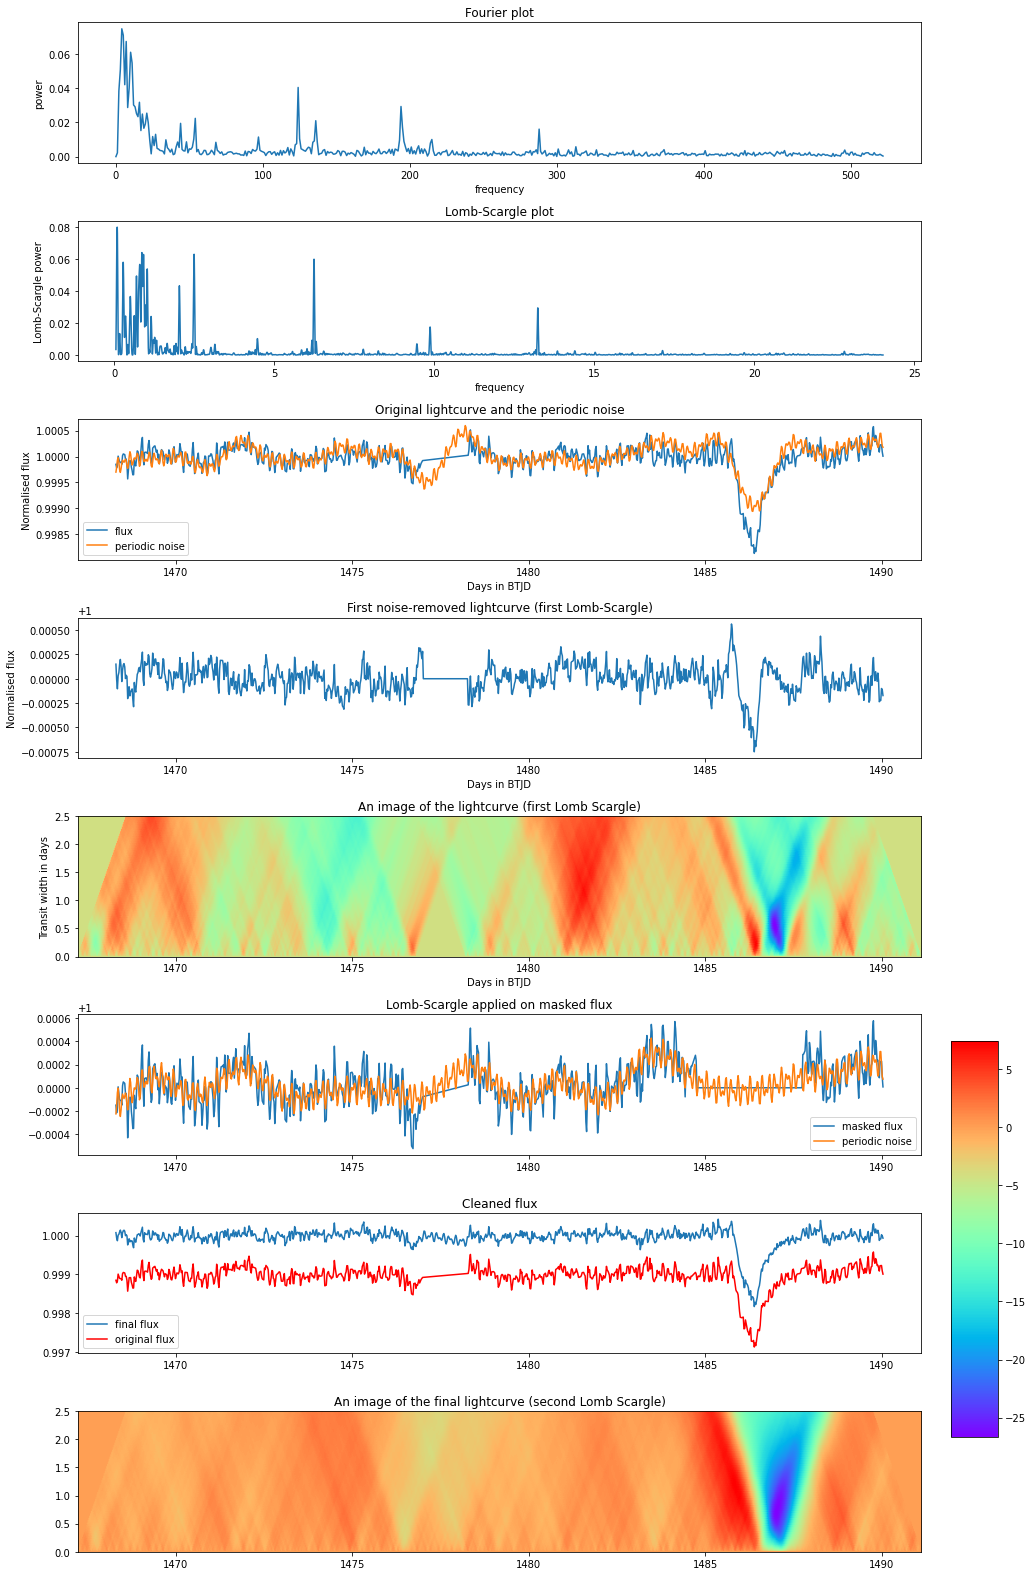

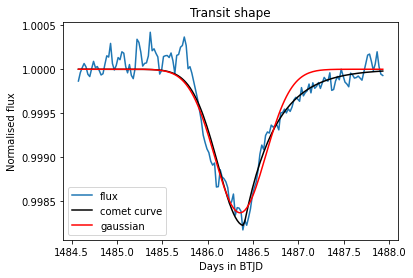

In [4]:
%run -i single_analysis.py /storage/astro2/phsqzm/TESS/SPOC_30min/S06/target/0000/0002/7057/7175/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits

### 30 minute - Sector 5

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1459.14 days.
   Duration = 0.33 days.
   T = -14.9
   T/sigma = -5.0
Transit depth = -0.000398
Asym score: 1.1438
Quality flags: 0
maybeTransit


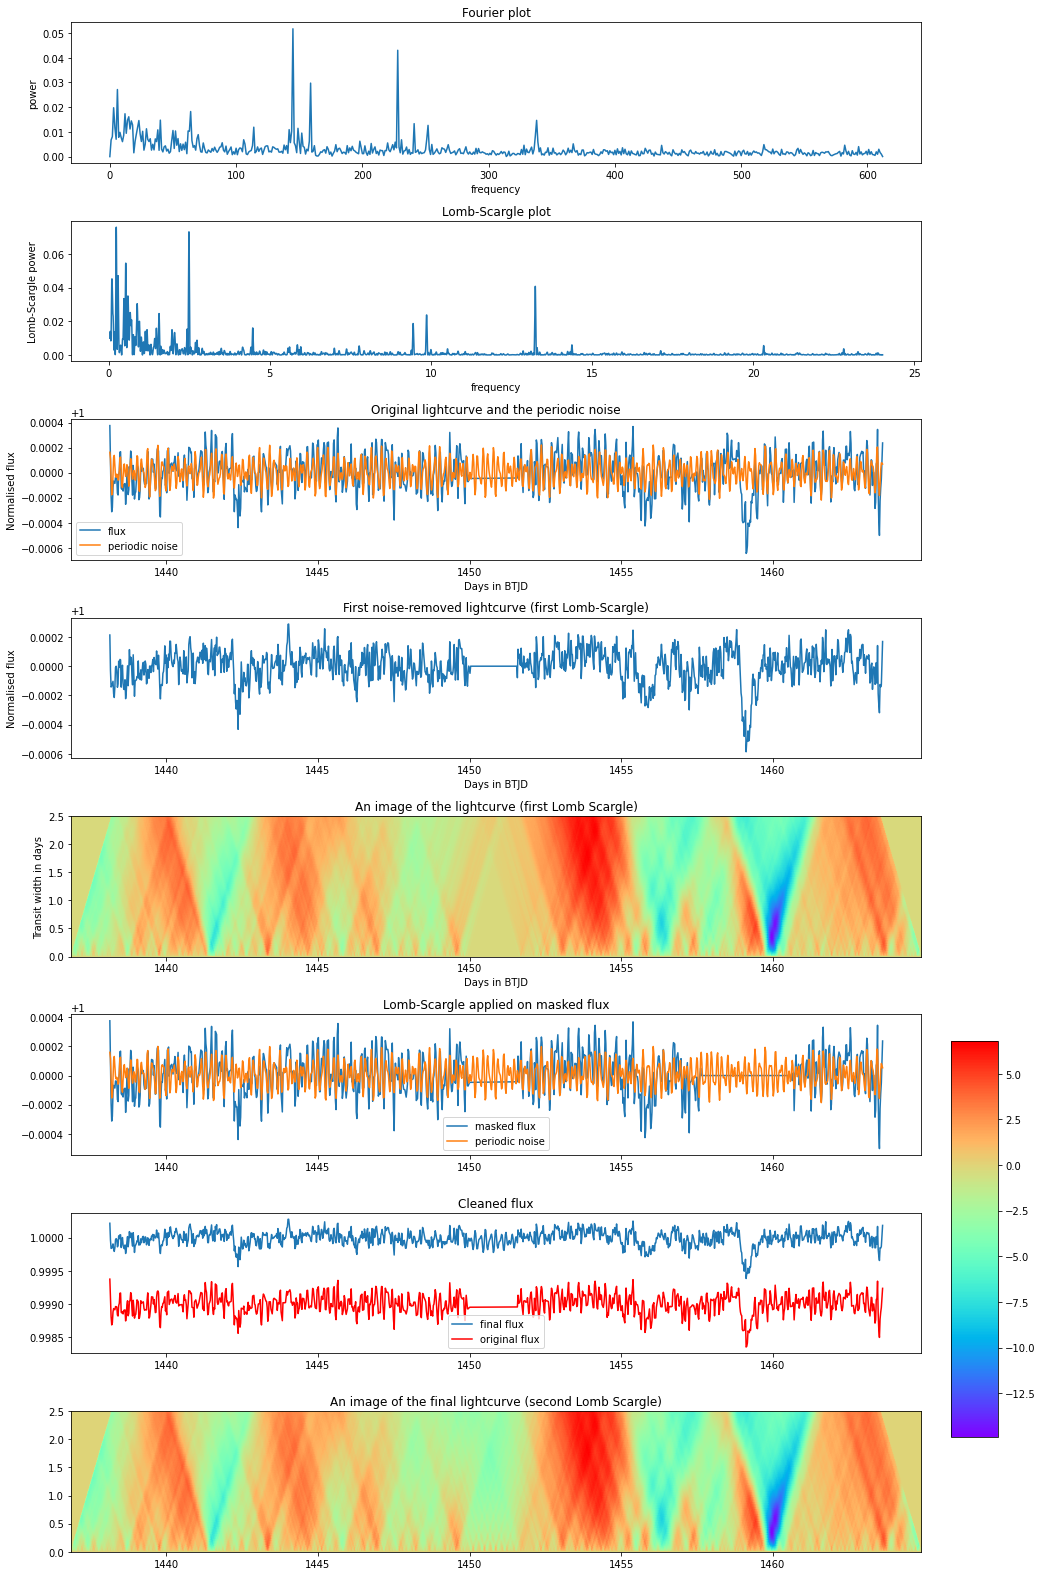

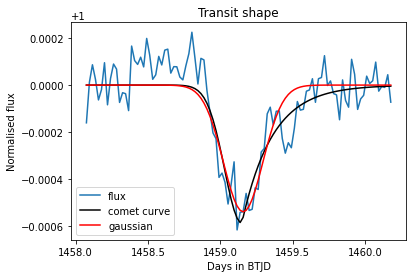

In [5]:
%run -i single_analysis.py /storage/astro2/phsqzm/TESS/SPOC_30min/S05/target/0000/0002/7057/7175/hlsp_tess-spoc_tess_phot_0000000270577175-s0005_tess_v1_lc.fits

### 30 minutes - Sector 7

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1492.53 days.
   Duration = 1.62 days.
   T = -7.2
   T/sigma = -2.7
Transit depth = -4.4e-05
end


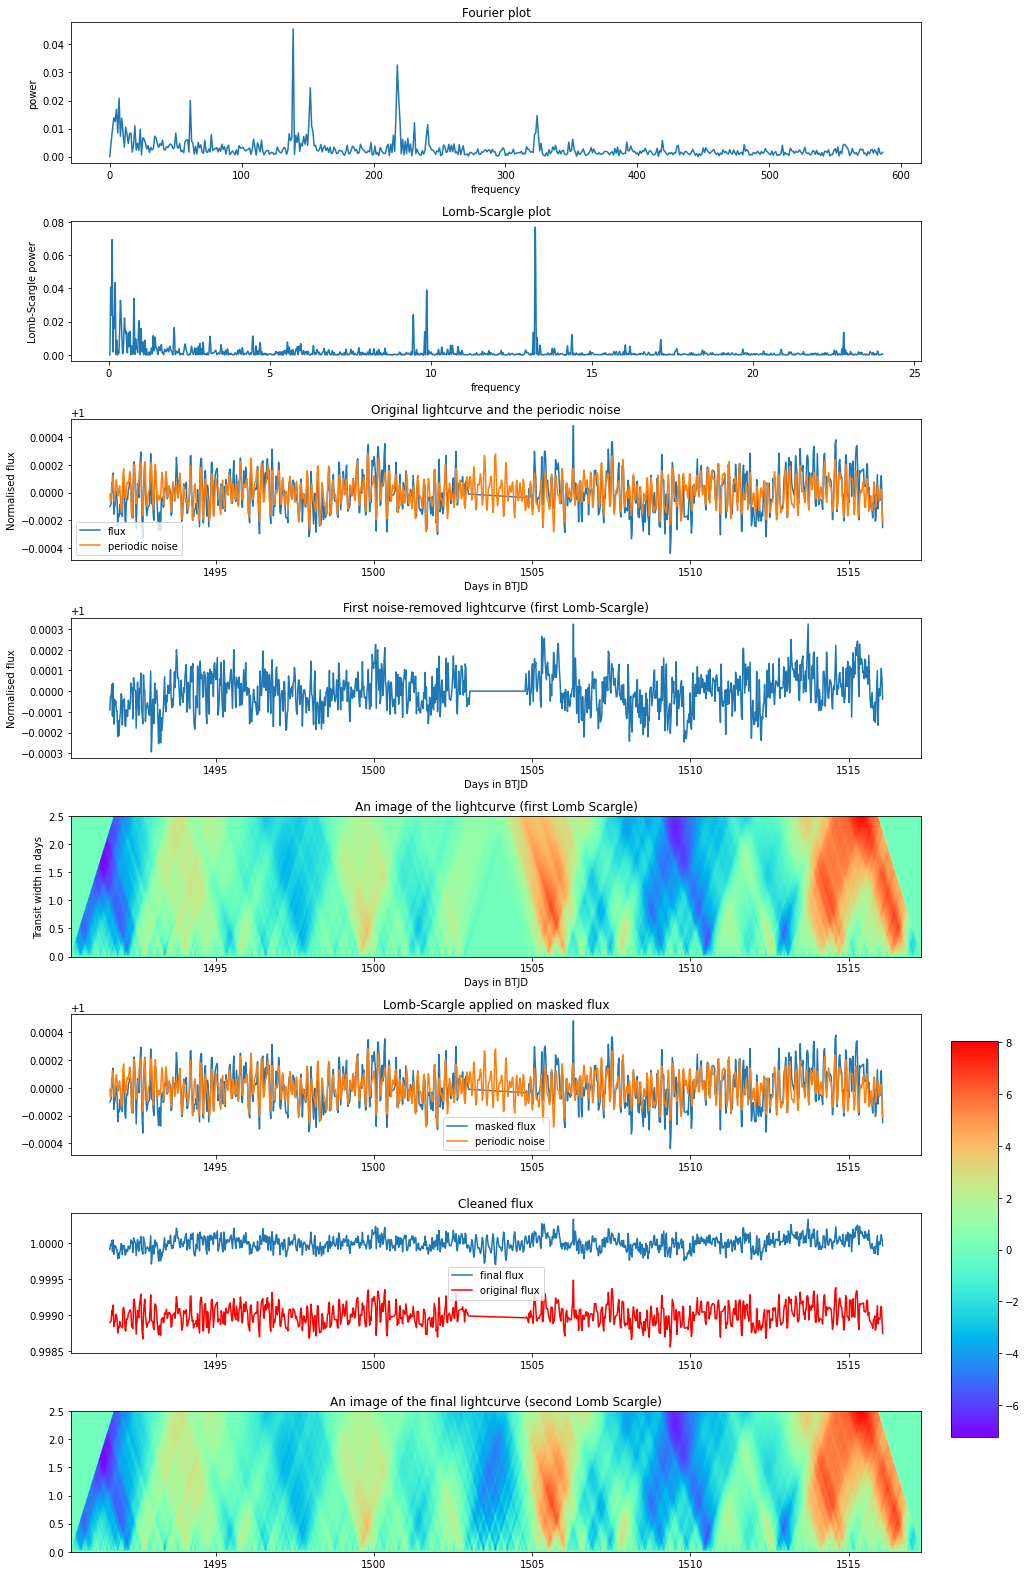

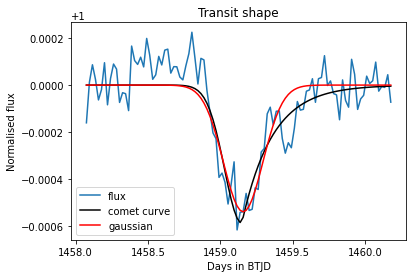

In [6]:
%run -i single_analysis.py /storage/astro2/phsqzm/TESS/SPOC_30min/S07/target/0000/0002/7057/7175/hlsp_tess-spoc_tess_phot_0000000270577175-s0007_tess_v1_lc.fits

### 30 minutes - Sector 32

In [7]:
#%run -i single_analysis.py /storage/astro2/phrvdf/TESS/SPOC_30min/S33/target/0000/0002/7057/7175/hlsp_tess-spoc_tess_phot_0000000270577175-s0033_tess_v1_lc.fits

#### `single_analysis` on 2 minute - Sector 6

In [8]:
#%run -i single_analysis.py tess_testlcs/spoc_2min/S6/tess2018349182459-s0006-0000000270577175-0126-s_lc.fits

#### `single_analysis` on Kepler

Timestep of lightcurve:  29.425 minutes.
Maximum transit chance:
   Time = 1175.73 days.
   Duration = 0.49 days.
   T = -41.5
   T/sigma = -9.2
Transit depth = -0.000856
Asym score: 1.5777
Quality flags: 16
maybeTransit


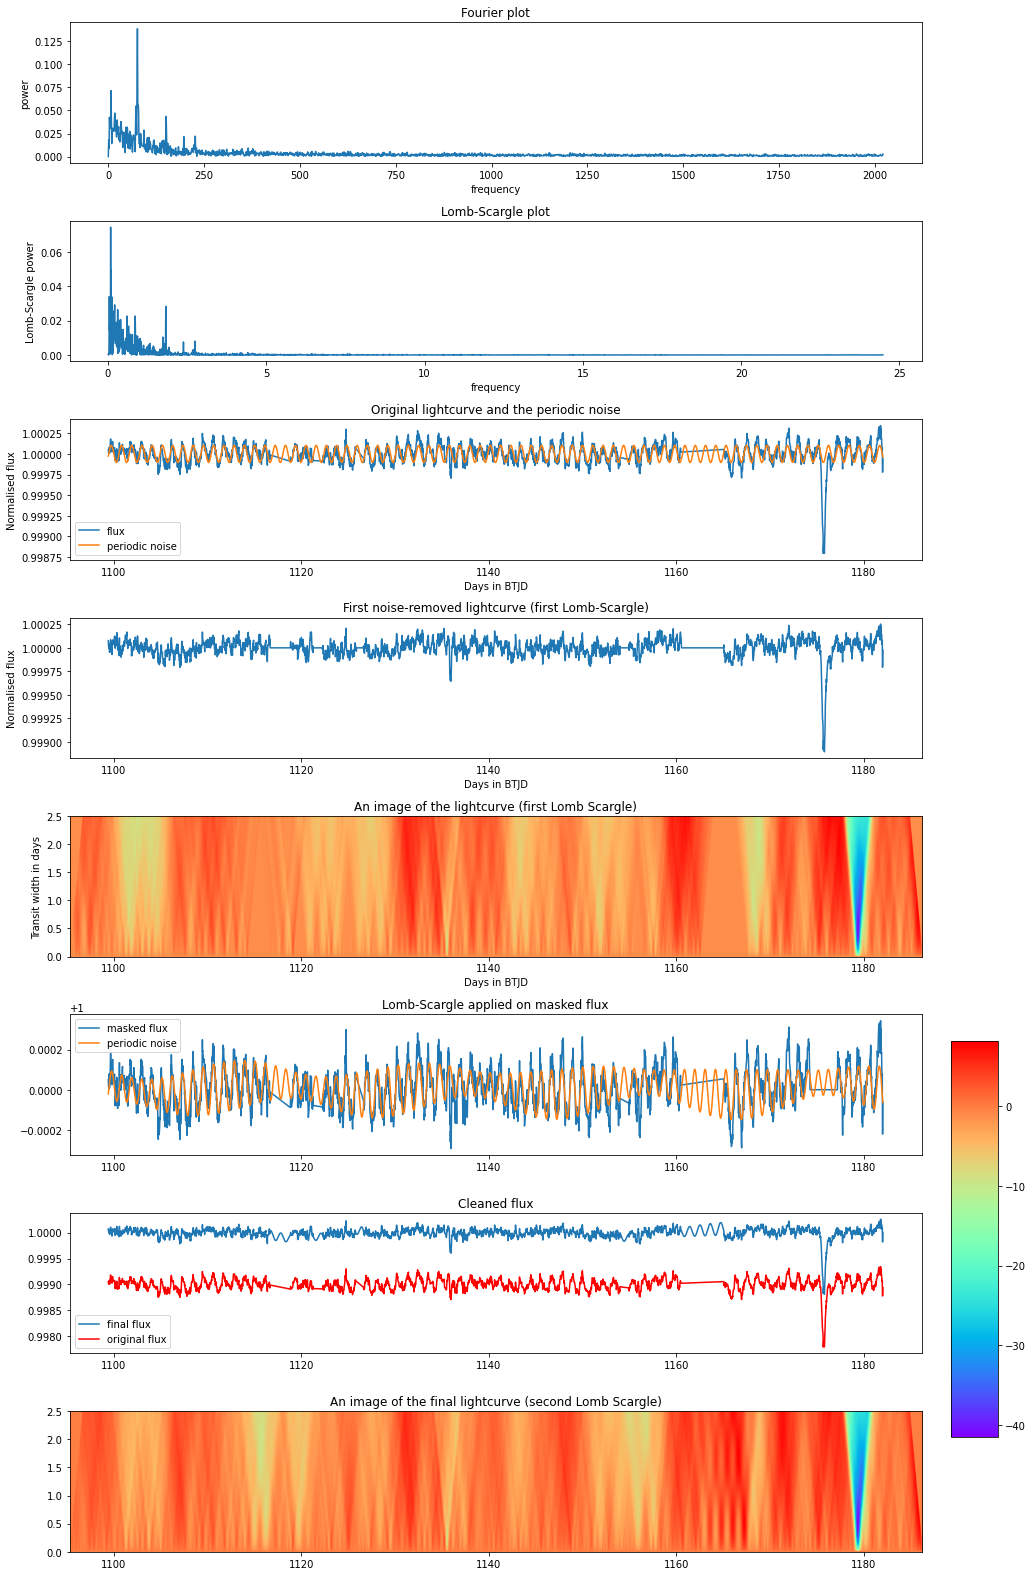

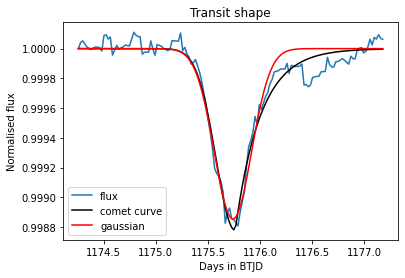

In [9]:
%run -i single_analysis.py kepler/kplr003542116-2012088054726_llc.fits 

---

#### WASP 107-b

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1574.14 days.
   Duration = 0.1 days.
   T = -16.7
   T/sigma = -8.3
Transit depth = -0.021194
Asym score: 0.6022
Quality flags: 0
maybeTransit


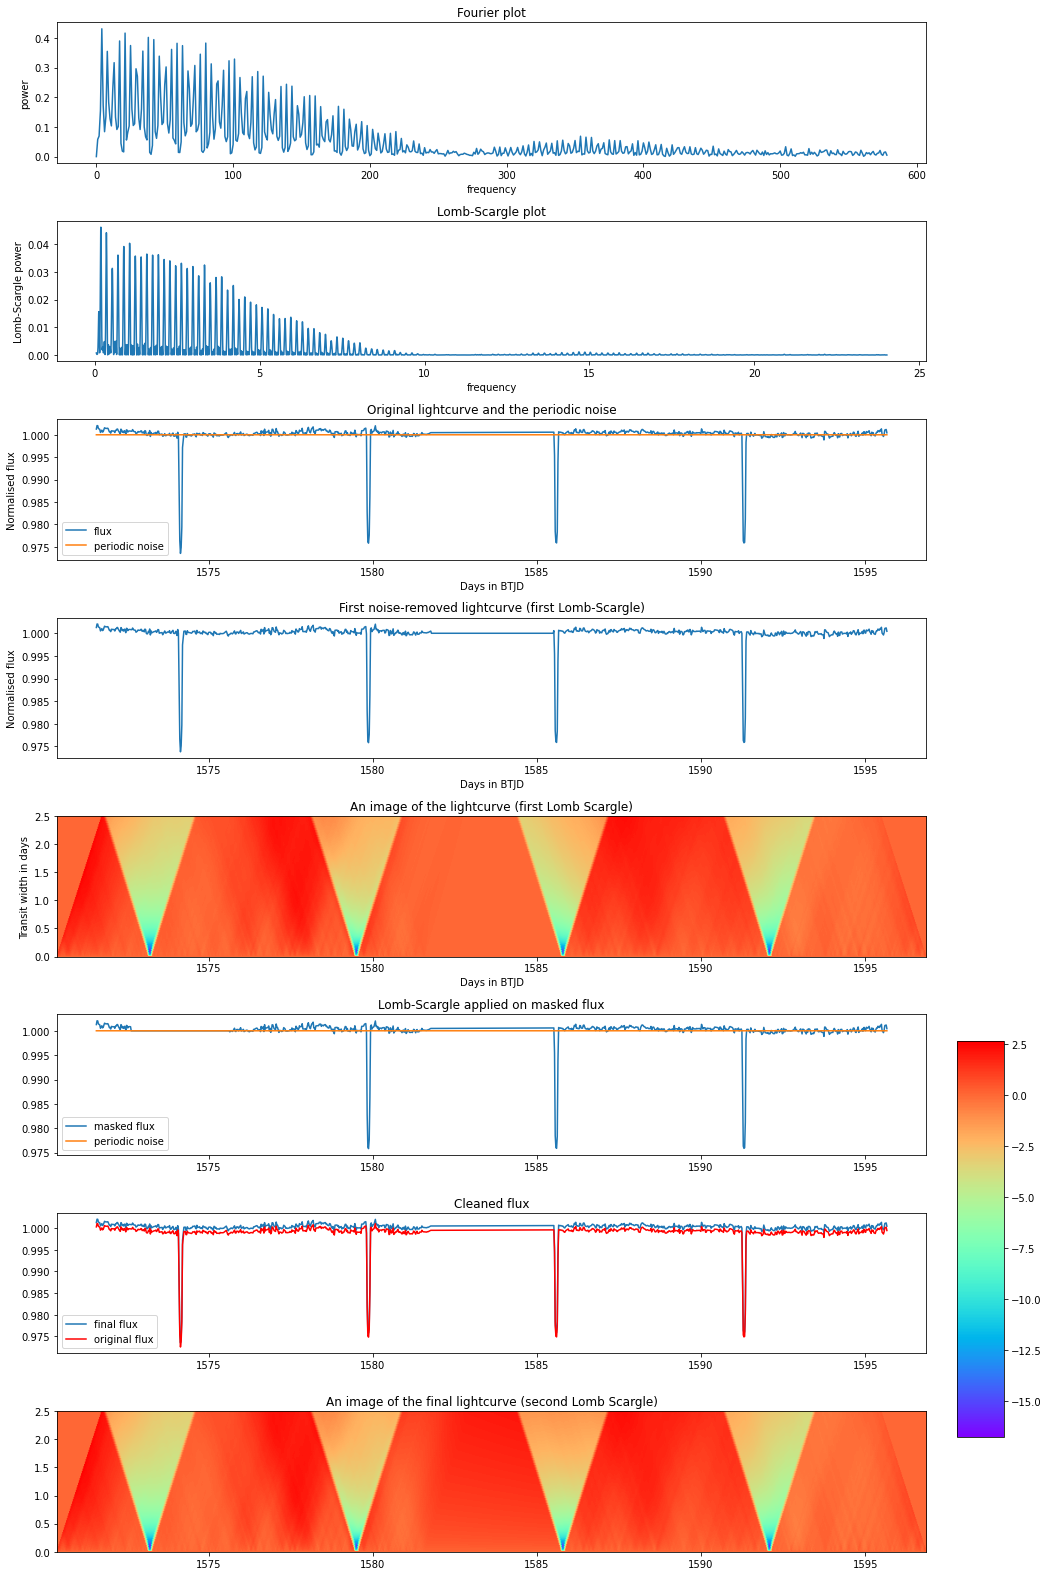

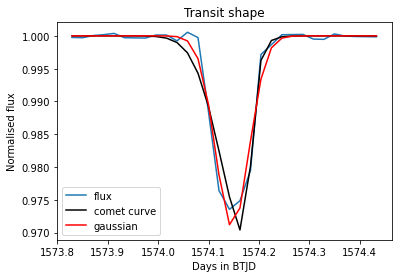

In [10]:
%run -i single_analysis.py /storage/astro2/phsqzm/TESS/SPOC_30min/S10/target/0000/0004/2930/2040/hlsp_tess-spoc_tess_phot_0000000429302040-s0010_tess_v1_lc.fits

---

## Eleanor

In [11]:
import eleanor
import pandas as pd
import data
import loaders

In [12]:
star = eleanor.Source(tic=270577175, sector=6)
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=False, do_pca=True, regressors='corner')
q = data.quality == 0

INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0006-3-3-cal-1686-0592_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0006-3-3-cal-1686-0592_tess_v2_bkg.fits with expected size 61162560. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0006-3-3-cal-1686-0592_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0006-3-3-cal-1686-0592_tess_v2_pc.fits with expected size 122411520. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0006-3-3-cal-1686-0592_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0006-3-3_tess_v2_pm.txt with expected size 185294. [astroquery.query]


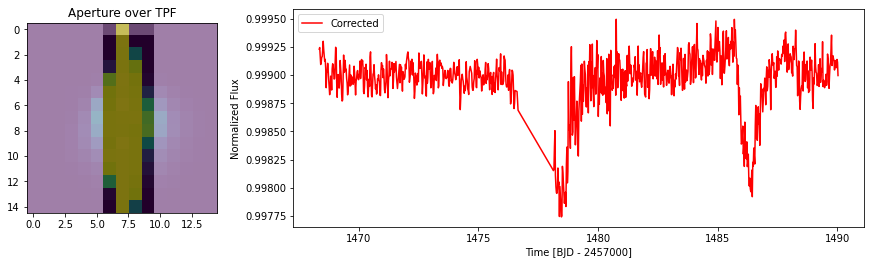

In [13]:
eleanor.TargetData.custom_aperture(data, shape='rectangle', h=15,w=4)
eleanor.TargetData.get_lightcurve(data)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

#ax2.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k', label='Raw')
ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.001, 'r', label='Corrected')
#ax2.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]) - 0.002, 'b', label='Corrected')
ax2.legend()
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

In [14]:
df = pd.DataFrame(data=[data.time[q],data.corr_flux[q],data.quality[q]]).T
columns = ['time','corr_f','quality']
df.columns = columns

In [15]:
df

time        corr_f  quality
0    1468.345849  4.454004e+06      0.0
1    1468.366682  4.454068e+06      0.0
2    1468.408349  4.453397e+06      0.0
3    1468.429182  4.453477e+06      0.0
4    1468.450016  4.453685e+06      0.0
..           ...           ...      ...
932  1489.929055  4.453470e+06      0.0
933  1489.949888  4.453266e+06      0.0
934  1489.991554  4.453598e+06      0.0
935  1490.012387  4.453489e+06      0.0
936  1490.033220  4.452960e+06      0.0

[937 rows x 3 columns]

In [16]:
df.to_csv('test.csv',index=False)

---

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1486.35 days.
   Duration = 0.77 days.
   T = -19.9
   T/sigma = -3.9
Transit depth = -0.000719
Asym score: 1.0231
Quality flags: 0
maybeTransit


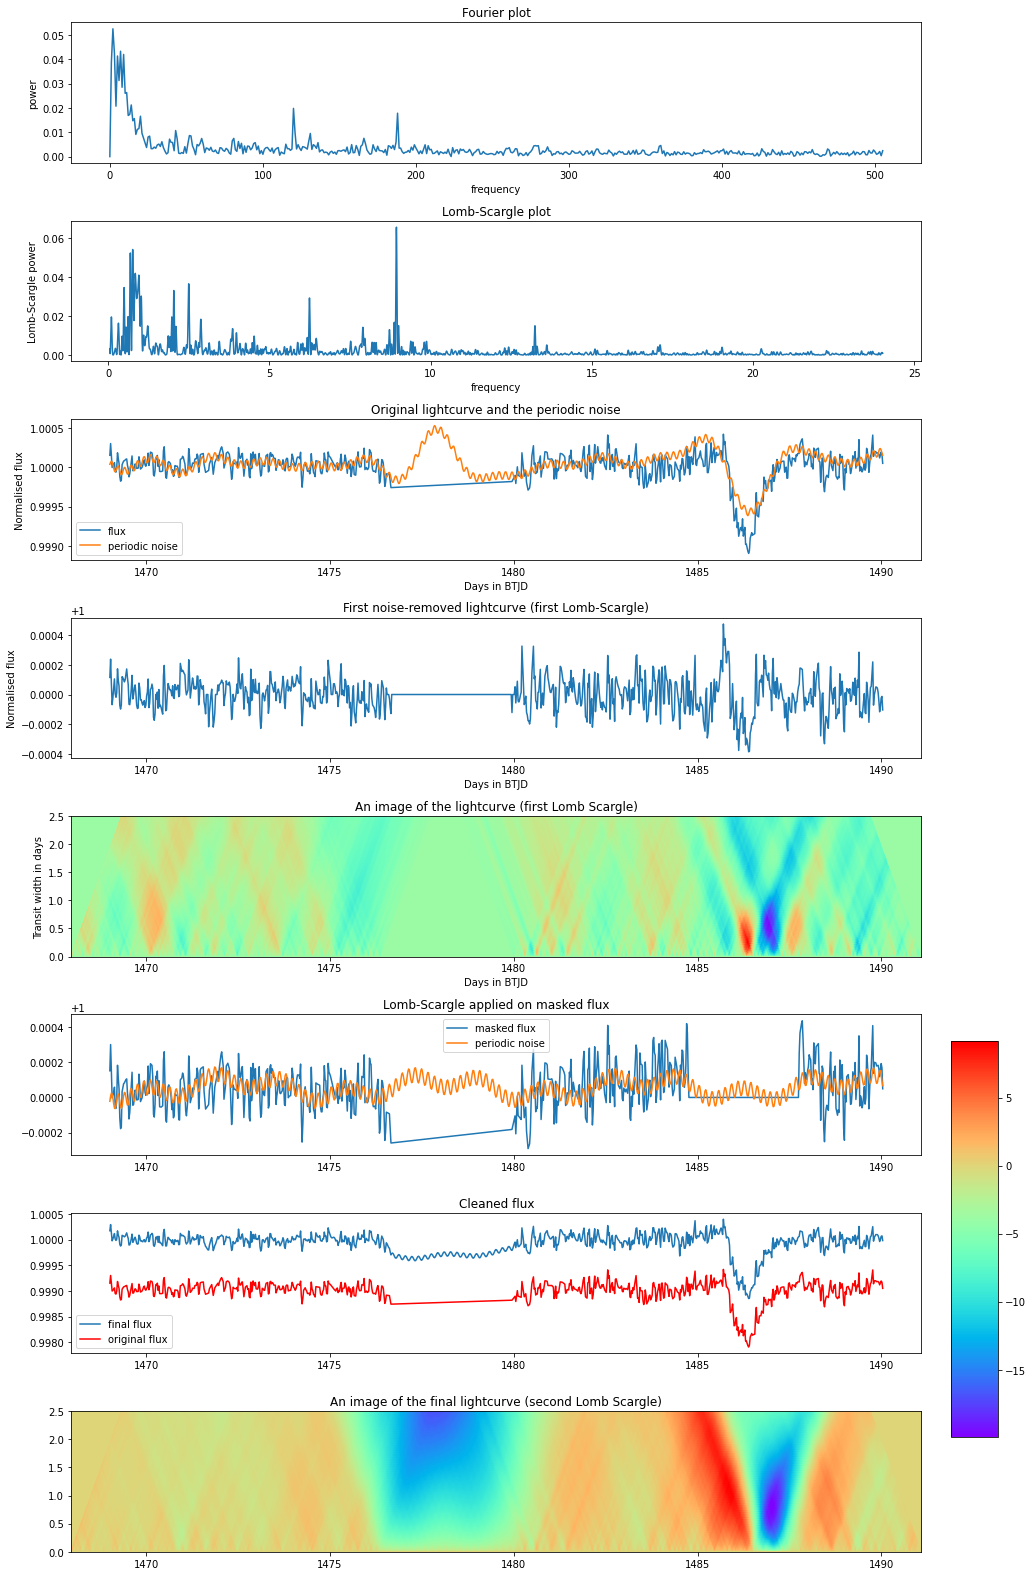

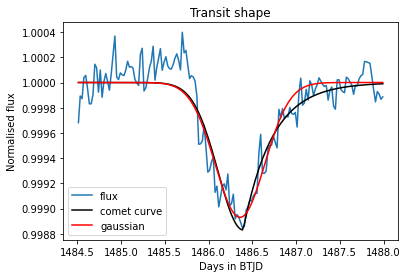

In [17]:
%run -i single_analysis.py test.csv

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1480.91 days.
   Duration = 1.4 days.
   T = -10.3
   T/sigma = -2.7
Transit depth = -0.796771
Asym score: 1.0152
Quality flags: 1
end


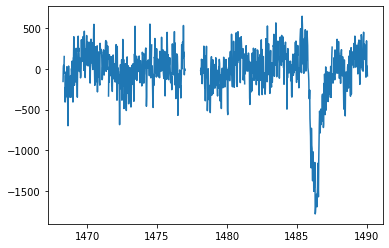

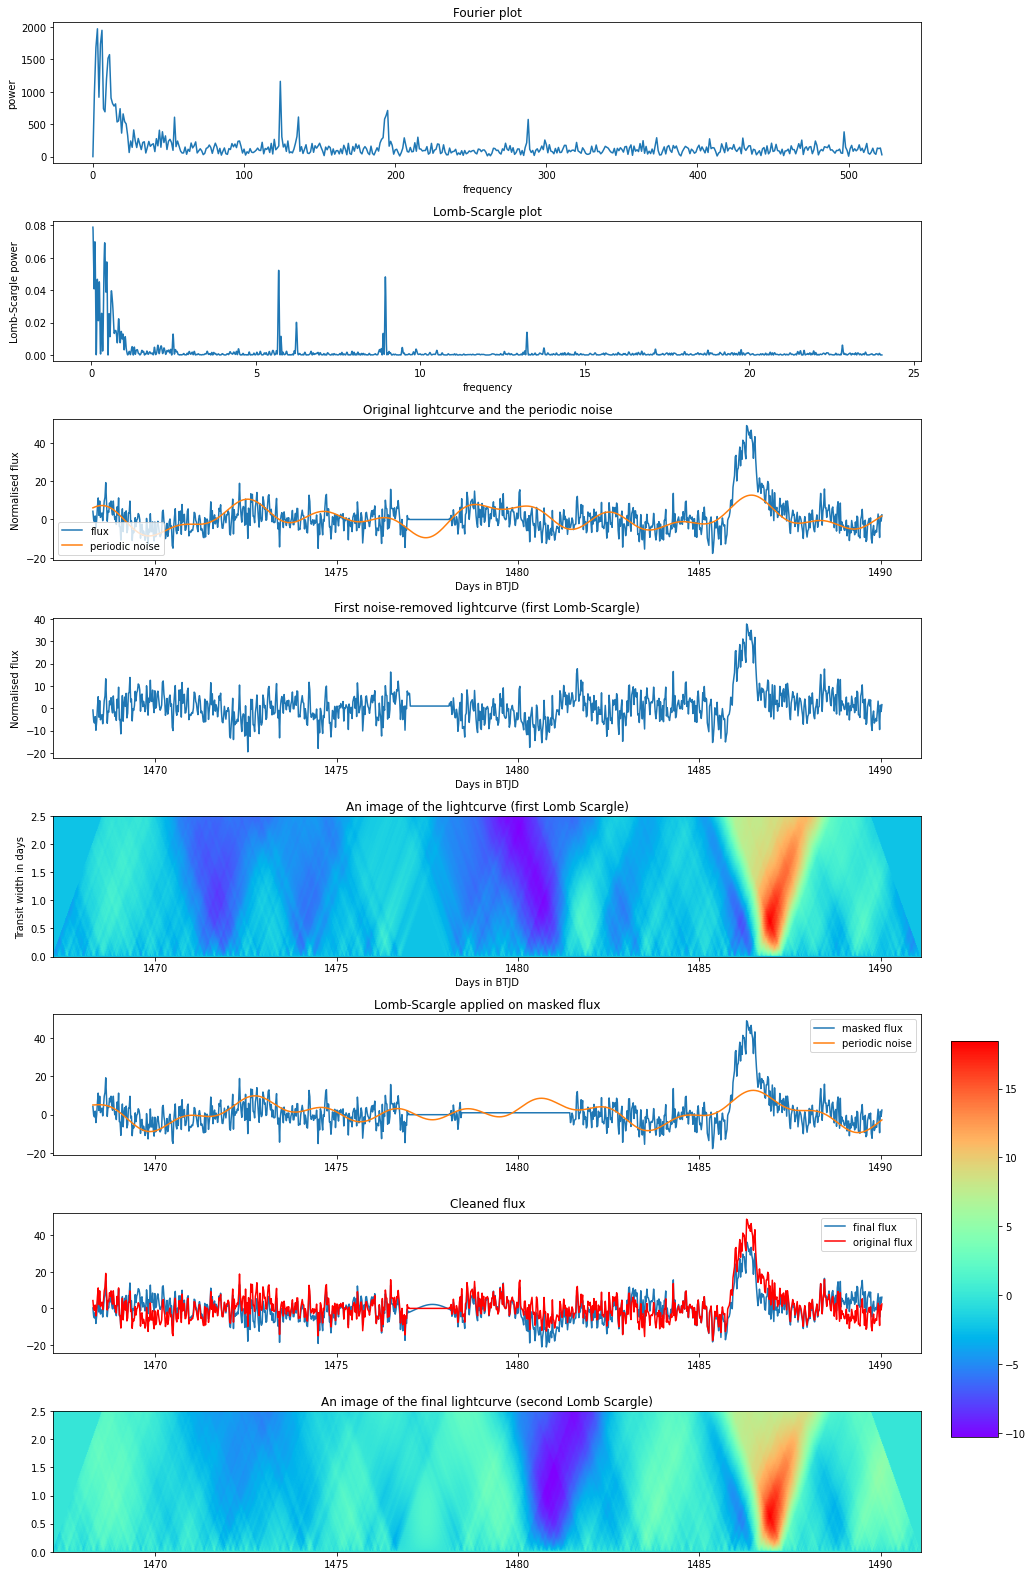

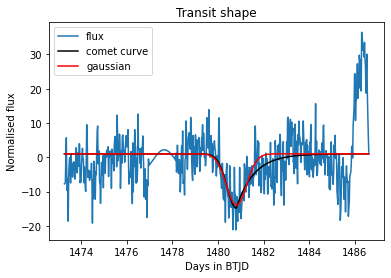

In [18]:
%run -i single_analysis.py betapic/tess00270577175-s006-3-3-c1800-dr08-v05-tasoc-cbv_lc.fits

---

In [19]:
hdul = fits.open('betapic/tess00270577175-s006-3-3-c1800-dr08-v05-tasoc-cbv_lc.fits')

In [20]:
sci = hdul[1].data
table = Table(sci)

In [21]:
table

<Table length=993>
       TIME          TIMECORR   ...      POS_CORR1            POS_CORR2      
     float64         float32    ...       float64              float64       
------------------ ------------ ... -------------------- --------------------
1468.2833383264951 0.0015437384 ...  0.03128770501427861 0.040586603610675974
1468.3041716786101 0.0015437626 ... 0.030621633767725427  0.04016005267858365
1468.3250050307252 0.0015437864 ... 0.029628189425480515  0.04043523759797507
1468.3458383823745 0.0015438097 ...      0.0302503414271   0.0388906823309437
1468.3666717335582 0.0015438327 ... 0.028458643335515264  0.03924479105692126
1468.3875050842762 0.0015438552 ... 0.007739850069375918  0.04810496223160491
1468.4083384345286 0.0015438774 ...  0.02823567707493718 0.037420618340492796
 1468.429171784781 0.0015438992 ... 0.028943027420709613  0.03713877194474827
 1468.450005134102 0.0015439205 ... 0.027908674638263516  0.03719220151653852
 1468.470838483423 0.0015439414 ... 0.028097921527491736  0.03626315868886728
               ...          ... ...                  ...                  ...
1489.8457083501853 0.0014190382 ... 0.014529473803486723  -0.0783284976761763
1489.8665413744748 0.0014187339 ...  0.01374330608360945 -0.07892673270614567
1489.8873743973672 0.0014184286 ...  0.01433639559689394 -0.07929373699482178
1489.9082074193284 0.0014181224 ... 0.013232507039497177 -0.07954751267979657
1489.9290404403582 0.0014178151 ... 0.013759930326229422 -0.07970782361284658
1489.9498734604567 0.0014175068 ... 0.012918830768674325 -0.08054601953622516
1489.9707064791583 0.0014171975 ...  0.01328282320758857 -0.08016522131967074
1489.9915394969285 0.0014168872 ... 0.012989249495899666 -0.08106069931274748
1490.0123725137673 0.0014165759 ... 0.013085028063077871 -0.08074031102830627
1490.0332055301405 0.0014162635 ... 0.012119597775608781 -0.08136602682350258

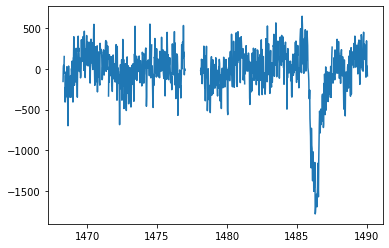

In [22]:
plt.plot(table['TIME'],table['FLUX_CORR'])